# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [1]:
# imports
import pandas as pd
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
ruta = "/content/dataset_banco_clean (1).csv"
data = pd.read_csv(ruta)

In [3]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


Se hace una columna que se llama has loan or housing para definir si si una persona tiene uno de los dos creditos y marque como si

In [5]:
data['has_loan_or_housing'] = data.apply(lambda row: 'yes' if row['housing'] == 'yes' or row['loan'] == 'yes' else 'no', axis=1)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   
3   47   blue-collar  married    unknown      no   1506.0     yes   no   
4   33       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may     261.0         1   -1.0         0  unknown  no   
1  unknown    5   may     151.0         1   -1.0         0  unknown  no   
2  unknown    5   may      76.0         1   -1.0         0  unknown  no   
3  unknown    5   may      92.0         1   -1.0         0  unknown  no   
4  unknown    5   may     198.0         1   -1.0         0  unknown  no   

  has_loan_or_housing  
0                 yes  
1                 yes  
2                 yes  
3       

**Análisis variables categóricas**




<ipython-input-7-458702668b3a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical, x=column, palette="Set3", ax=axes[row, col])
<ipython-input-7-458702668b3a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical, x=column, palette="Set3", ax=axes[row, col])
<ipython-input-7-458702668b3a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categorical, x=column, palette="Set3", ax=axes[row, col])
<ipython-input-7-458702668b3a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is dep

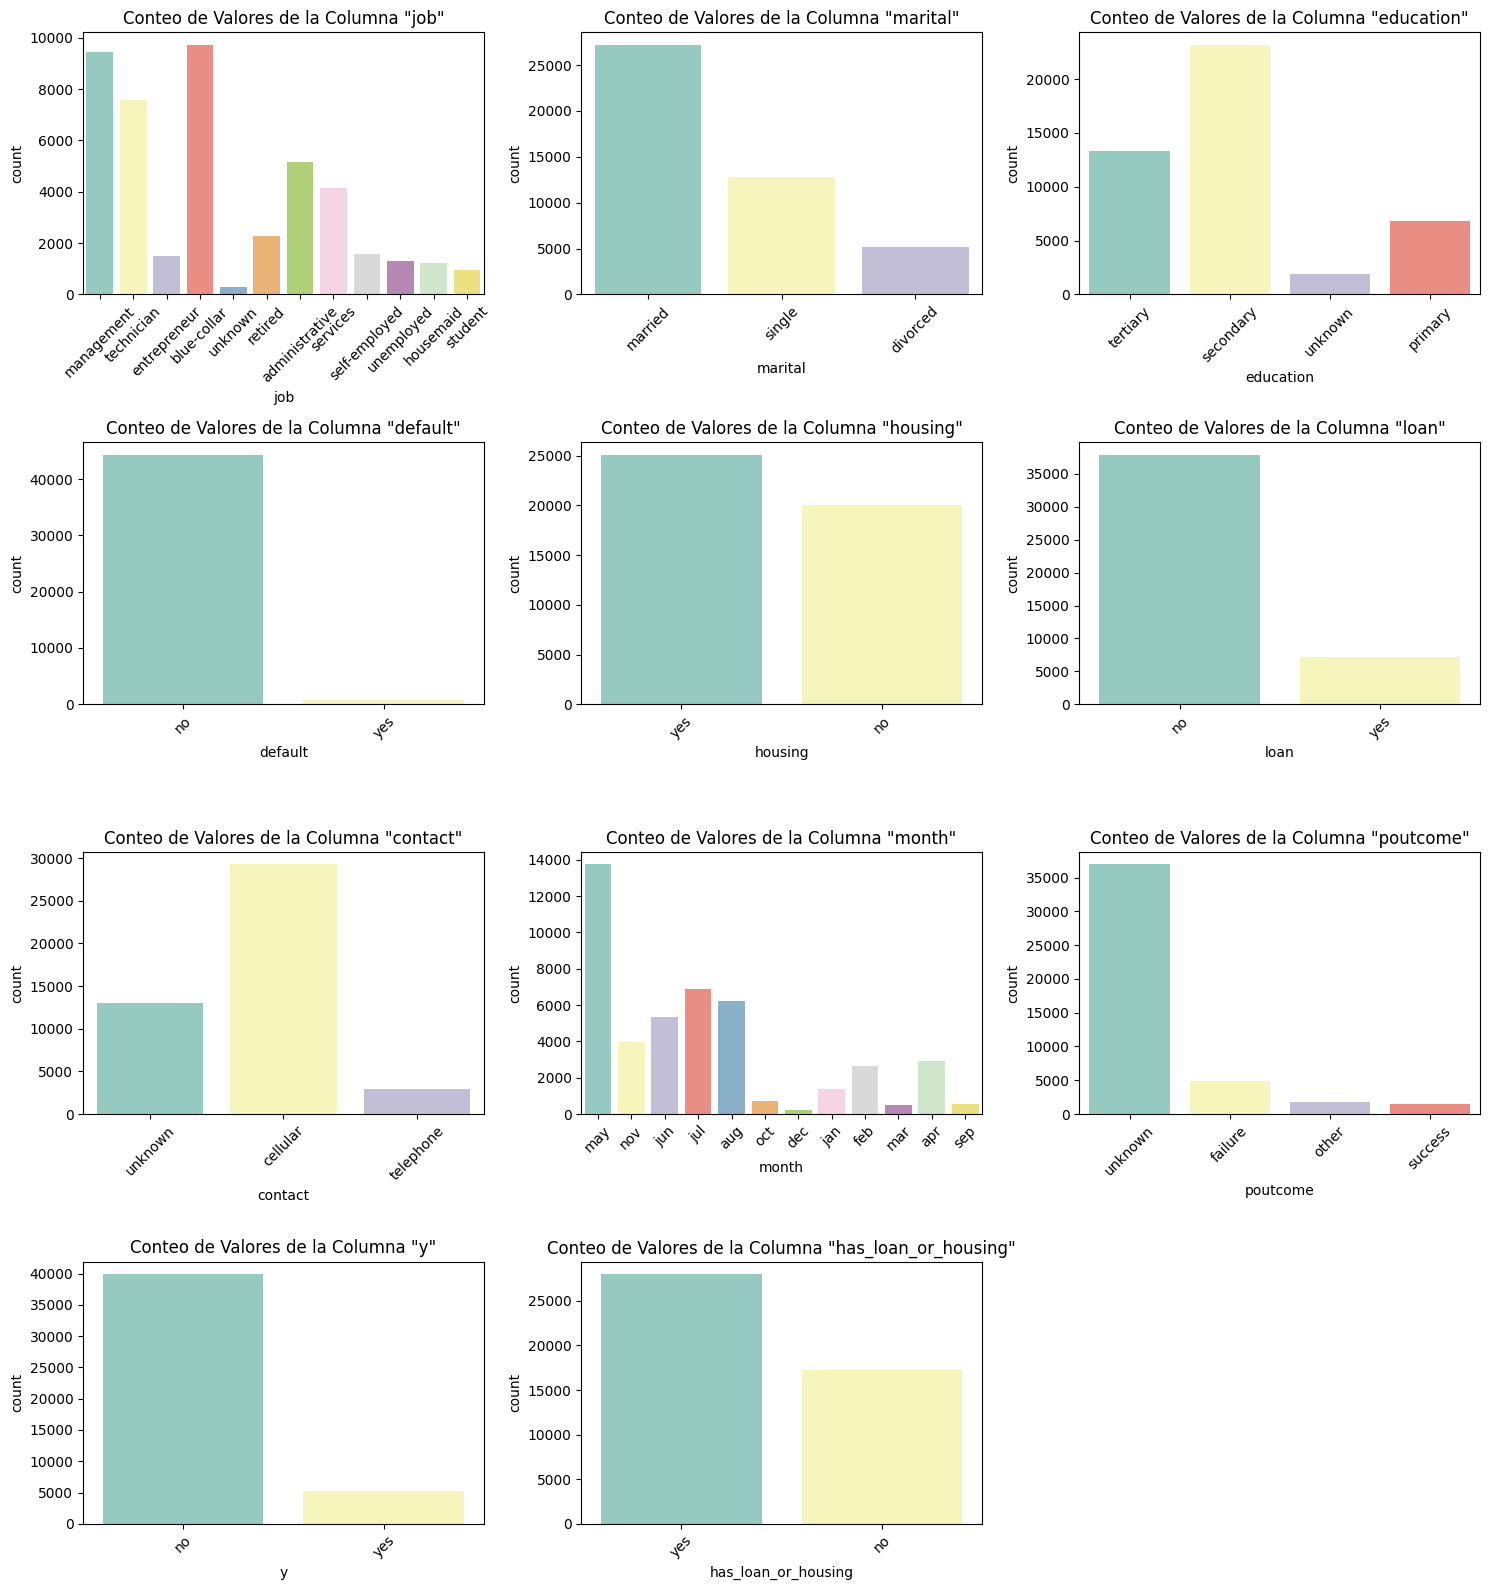

In [7]:
df = pd.DataFrame(data)

# Seleccionar solo las columnas categóricas
df_categorical = df.select_dtypes(include=['object'])

# Obtener el número de filas y columnas necesarias para la disposición de los subgráficos
num_cols = 3
num_rows = (len(df_categorical.columns) - 1) // num_cols + 1

# Crear la figura y los ejes de los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))

# Iterar sobre las columnas categóricas y trazar los gráficos en los subgráficos correspondientes
for i, column in enumerate(df_categorical.columns):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(data=df_categorical, x=column, palette="Set3", ax=axes[row, col])
    axes[row, col].set_title(f'Conteo de Valores de la Columna "{column}"')
    axes[row, col].set_xlabel(column)
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad

# Ocultar los subgráficos que no se utilizaron
for i in range(len(df_categorical.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Ajustar el espaciado entre subgráficos y mostrar la figura
plt.tight_layout()
plt.show()


Para cada variable categórica:
job: 12 tipos de trabajo

*   marital: 3 (married, single, divorced)
*   education: 4(primary, secundary, terciary, unknown)
*   default: yes, no (mayoria de contactados no)
*   housing: yes, no (balanceado)
*   loan: yes, no (mayoria de contactados no)
*   poutcome: 4 (unknown, failure, other, success, mayoría en unknown)
*   y: yes, no (gran mayoria no)
*   has_loan_or_housing: yes, no (gran mayoria tiene credito vigente)


**Análisis con variables numéricos**

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000
mean,40.936445,1374.012149,15.807188,258.115006,2.763283,40.178893,0.574166
std,10.618502,3924.370039,8.322549,257.349601,3.096579,100.107295,1.907950
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


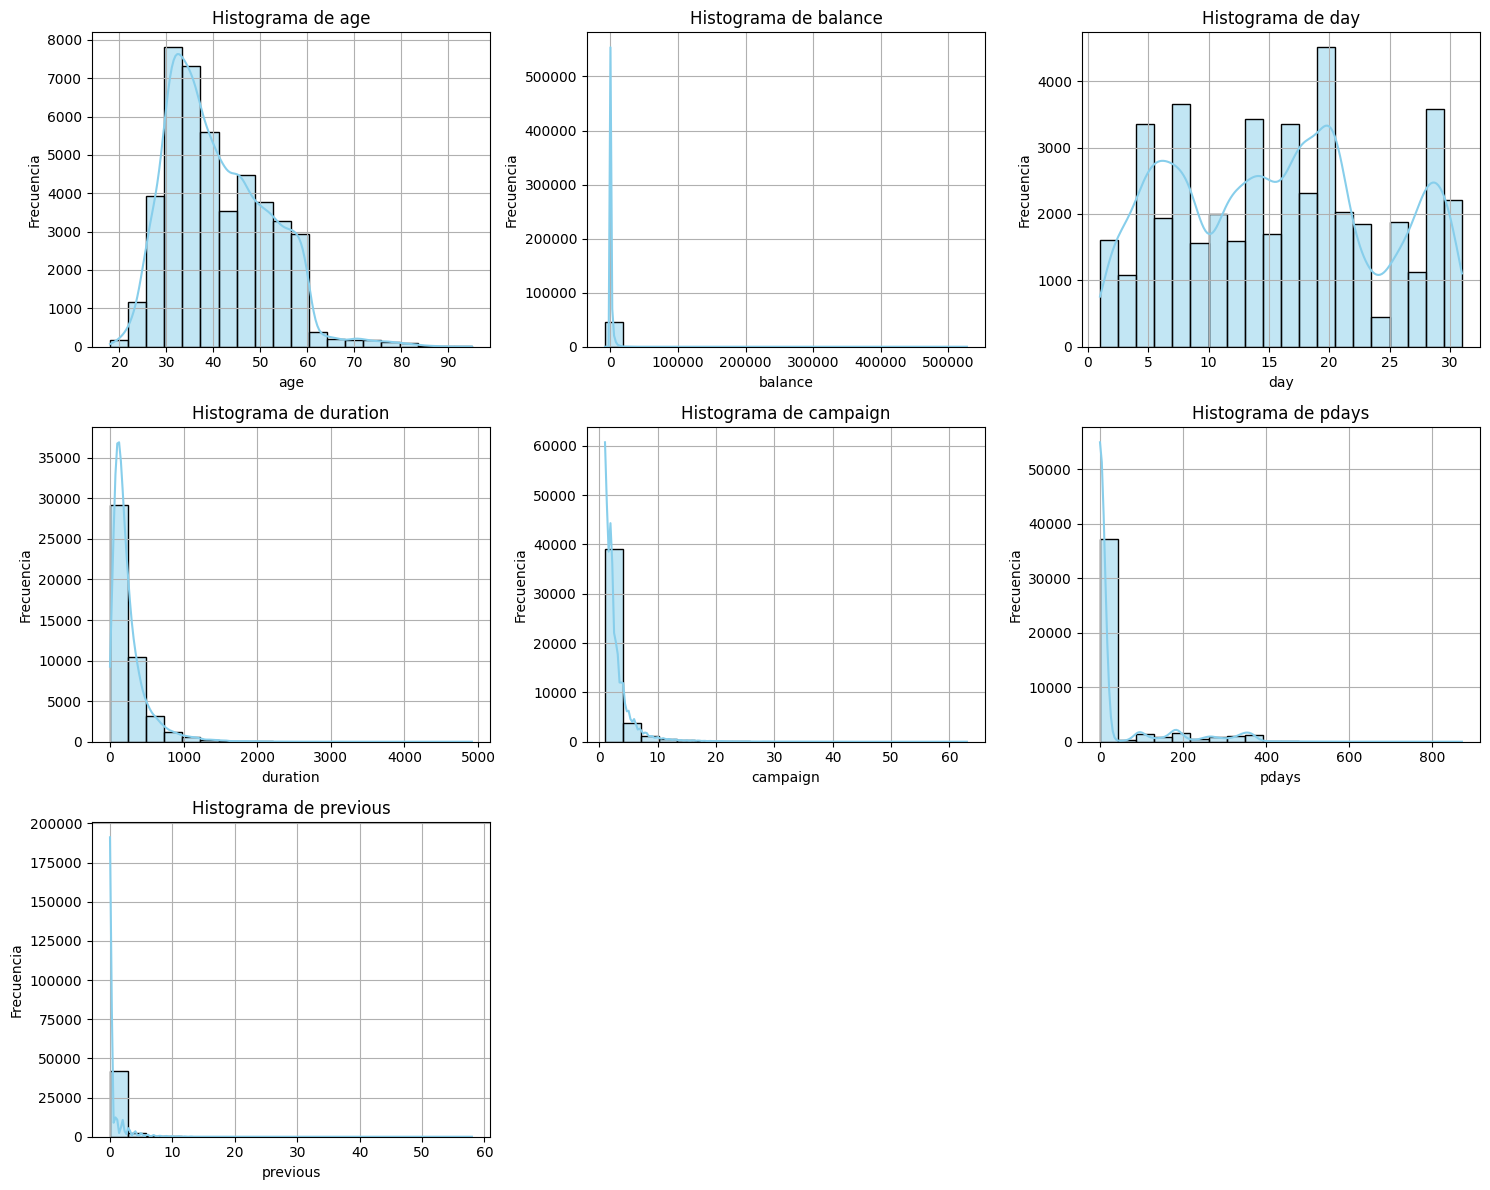

In [8]:
# Seleccionar solo las columnas numéricas
df_numeric = data.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas necesarias para la cuadrícula
num_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)
num_cols = min(len(df_numeric.columns), 3)

# Crear la figura y los ejes de los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))

# Iterar sobre las columnas numéricas y trazar un histograma para cada una
for i, column in enumerate(df_numeric.columns):
    row = i // num_cols
    col = i % num_cols
    if num_rows > 1 and num_cols > 1:
        ax = axes[row, col]
    elif num_rows == 1:
        ax = axes[col]
    else:
        ax = axes[row]
    sns.histplot(data=df_numeric[column], kde=True, ax=ax, color='skyblue', bins=20)
    ax.set_title(f"Histograma de {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frecuencia")
    ax.grid(True)  # Agregar rejilla para mayor claridad

# Eliminar los ejes de los subgráficos vacíos
for i in range(len(df_numeric.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Ajustar el espaciado entre subgráficos y mostrar la figura
plt.tight_layout()
plt.show()




Que ocurre con balance

In [9]:
data["balance"].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

La mayoria de personas contactadas de edad es de 30 a 40 años.
El 75 % de las personas contactadas tiene un balance menor a 1428

**Análisis Univariado**

In [17]:
#Creamos columnas y bin para realizar la tasa de conversion de una variable
diccionario = {'yes':1, 'no':0}
binario = data['y'].map(diccionario)
data['y_bin']= binario



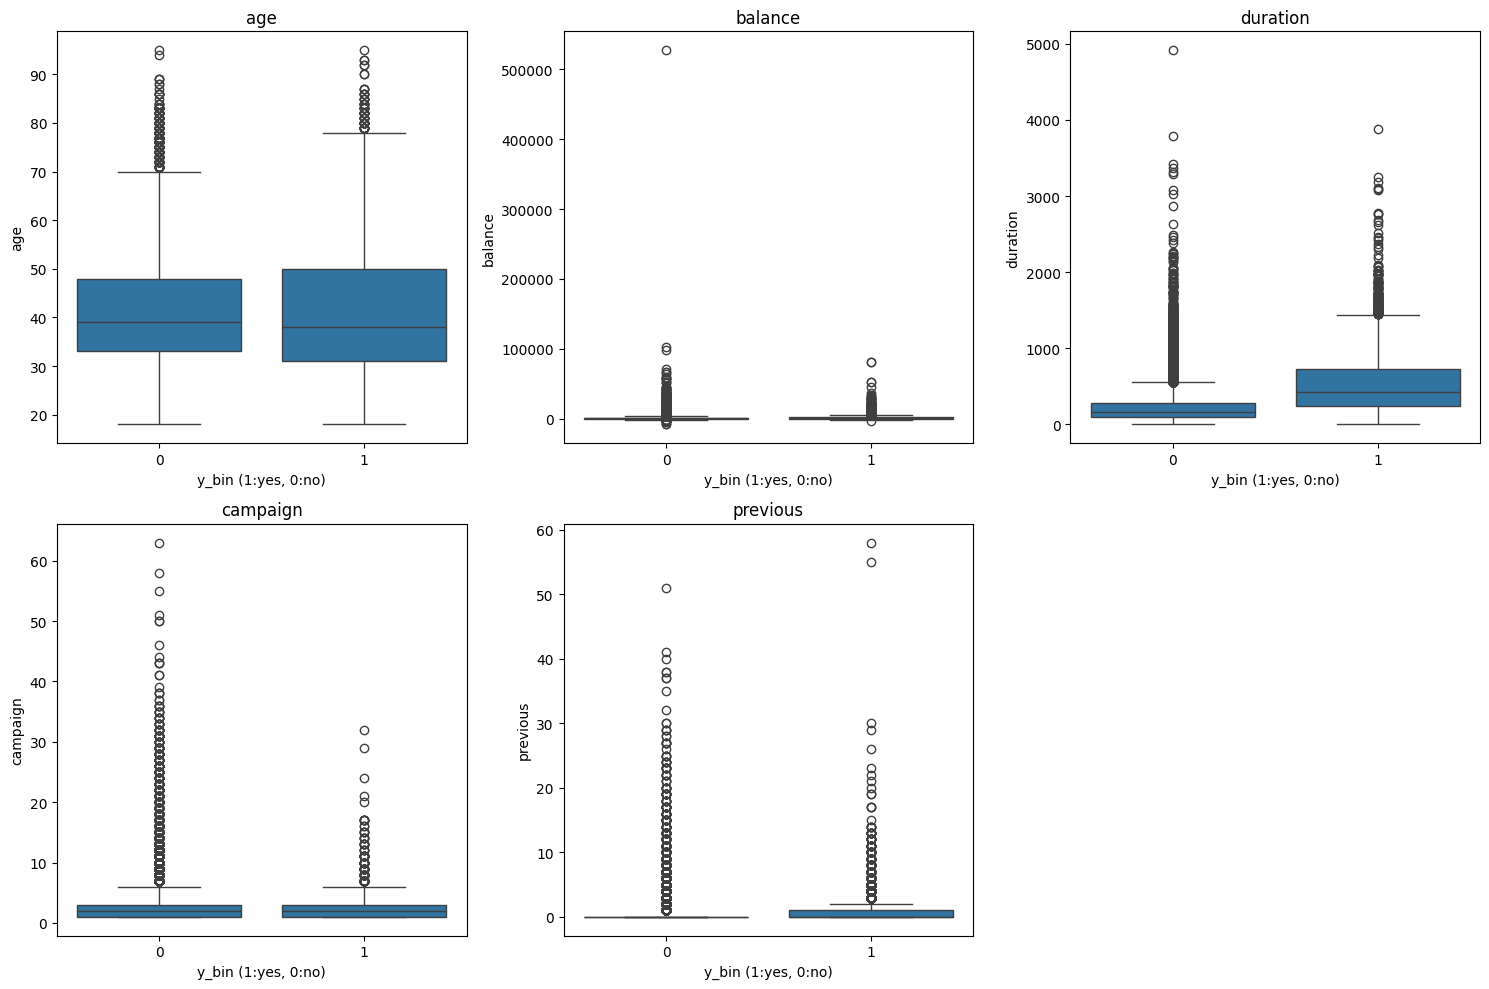

In [31]:
# Definir las variables numéricas
col_num = ['age', 'balance', 'duration', 'campaign', 'previous']

# Calcular el número de subgráficos necesarios
num_plots = min(len(col_num), 9)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=.5)

# Crear los boxplots
for i in range(num_plots):
    sns.boxplot(x='y_bin', y=col_num[i], data=data, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel('y_bin (1:yes, 0:no)')
    axes[i // 3, i % 3].set_title(col_num[i])

# Eliminar el último gráfico si hay un número impar de variables
if len(col_num) % 3 != 0:
    fig.delaxes(axes.flatten()[num_plots])

# Ajustar el diseño
plt.tight_layout()
plt.show()





*   En age, no se ve una diferencia importante en quienes adquirieron y quienes no.
*   En balance, campaign, previous igualmente no se observa diferencia.
*   En duration, quienes mas se demoraron fueron los que aceptaron.


**Grafico tasas de conversión**

In [36]:
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
  x, y = var_predictora, var_predecir

  grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

  if type =='line':
      plt.figure(figsize=(10,6))
      sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
      plt.grid()

  elif type == 'bar':
      plt.figure(figsize=(14,6))
      sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
      plt.grid()

  elif type == 'scatter':
      plt.figure(figsize=(10,6))
      sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
      plt.grid()


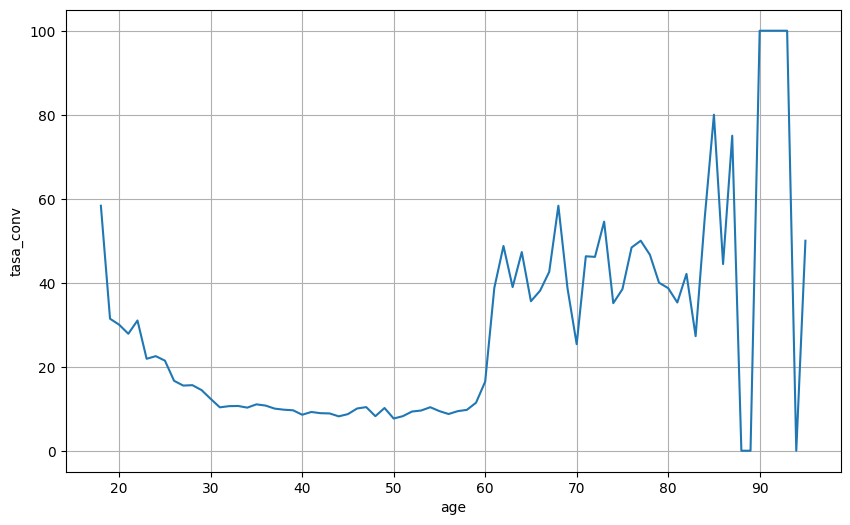

In [37]:
graficar_tasas_conversion('age', 'y_bin')

Si se observan diferencias de conversión, vamos a crear rangos de edad.

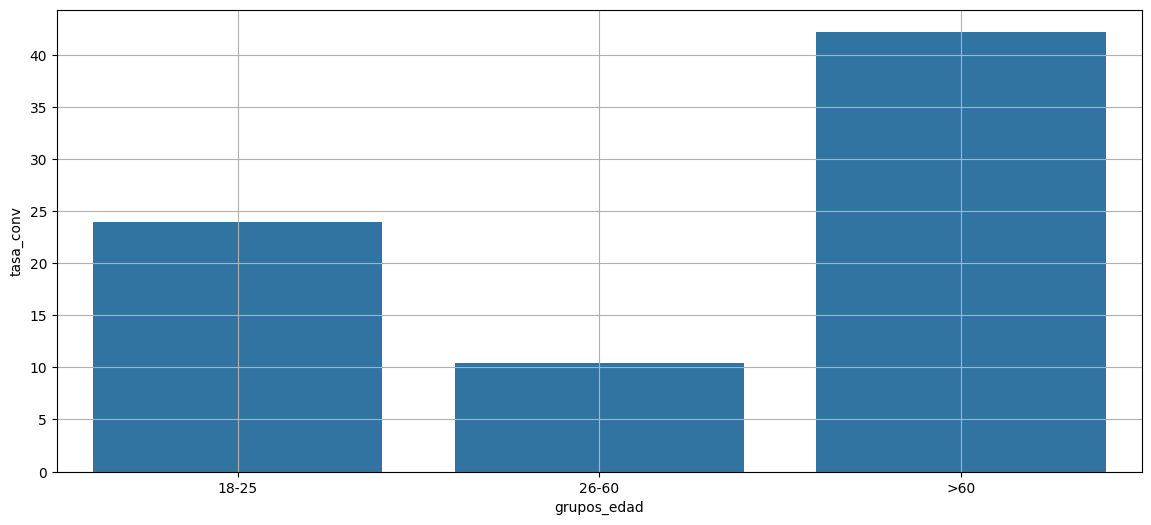

In [42]:
data.loc[:, 'grupos_edad']= '18-25'
data.loc[data['age']>60, 'grupos_edad']= '>60'
data.loc[(data['age']>25) & (data['age']<=60), 'grupos_edad']= '26-60'

graficar_tasas_conversion('grupos_edad', 'y_bin', type= 'bar')



*  Mayores de 60 años, se observa que existe un 43% de conversion de compra.



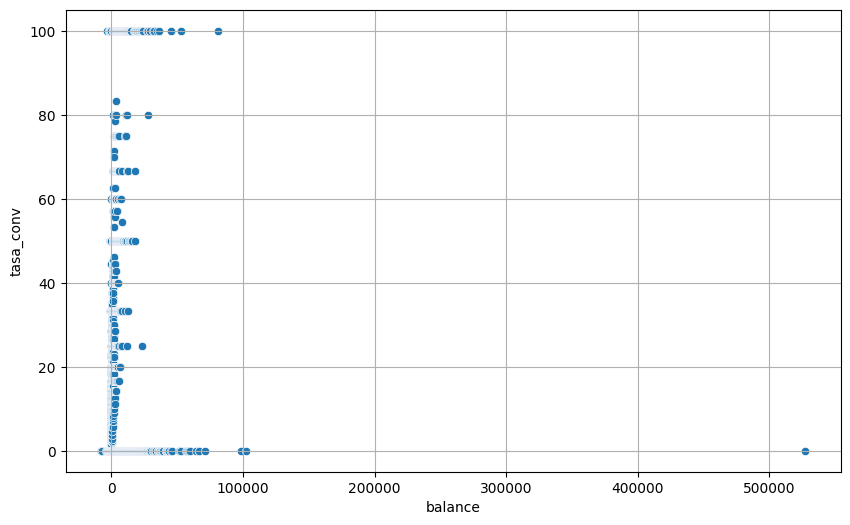

In [40]:
graficar_tasas_conversion('balance', 'y_bin', type= 'scatter')

Vamos a crear rangos de Balance

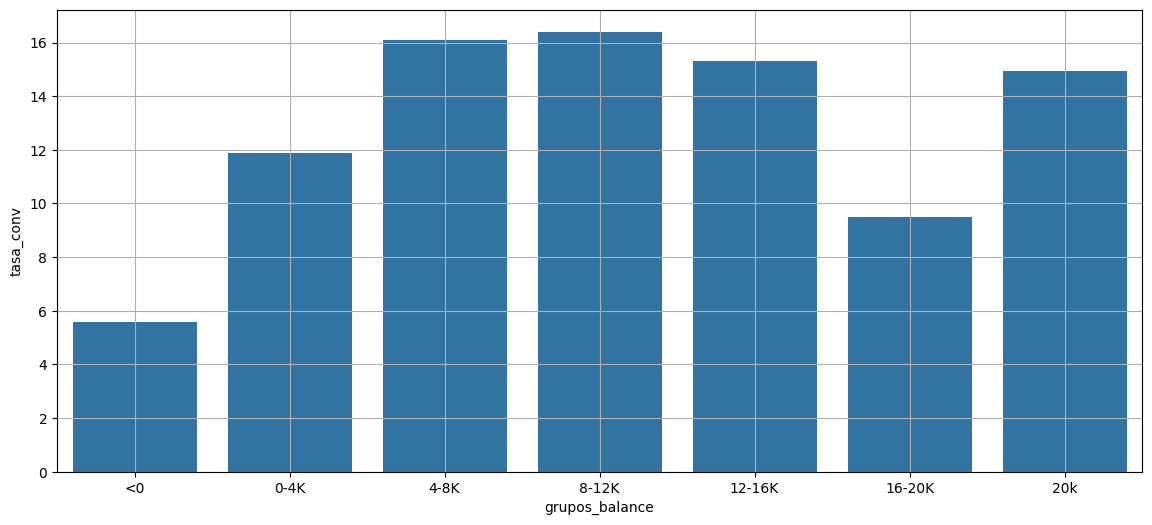

In [48]:
data.loc[:, 'grupos_balance']= '<0'
data.loc[(data['balance']>=0) & (data['balance']<4000), 'grupos_balance']= '0-4K'
data.loc[(data['balance']>=4000) & (data['balance']<8000), 'grupos_balance']= '4-8K'
data.loc[(data['balance']>=8000) & (data['balance']<12000), 'grupos_balance']= '8-12K'
data.loc[(data['balance']>=12000) & (data['balance']<16000), 'grupos_balance']= '12-16K'
data.loc[(data['balance']>=16000) & (data['balance']<20000), 'grupos_balance']= '16-20K'
data.loc[(data['balance']>20000), 'grupos_balance']= '20k'

orden = ['<0','0-4K','4-8K', '8-12K', '12-16K', '16-20K', '20k']
graficar_tasas_conversion('grupos_balance', 'y_bin', type= 'bar', order=orden)




*   Como se observa las tasas de conversion entre 4k y 16k son similares, por lo que podrían unirse para segmentarlos. Además, a excepción del rango 16k a 20k
se puede deducir que mientras más liquidez se posee, se tiene una tasa de conversión mas alta


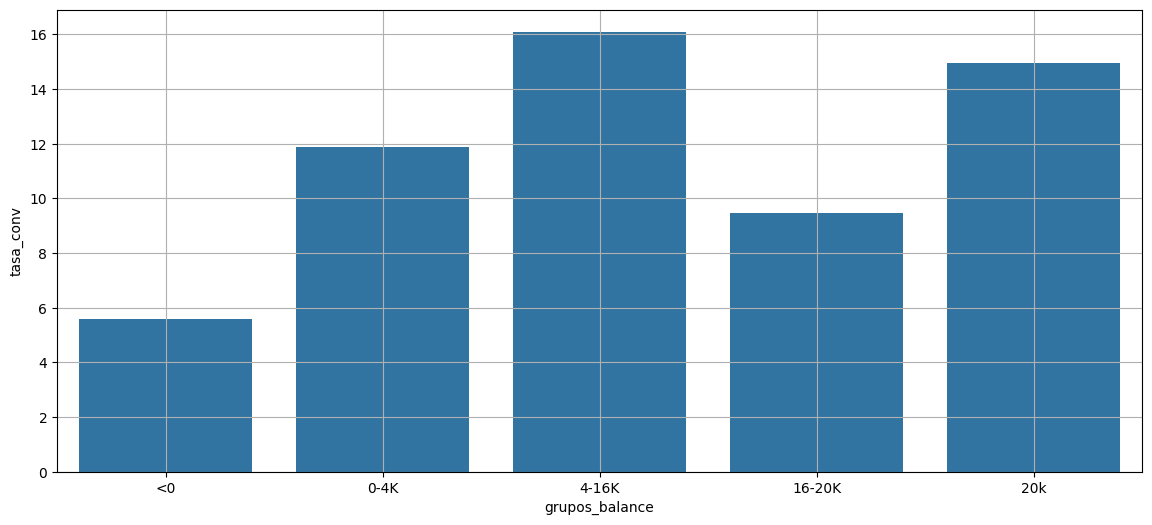

In [50]:
data.loc[:, 'grupos_balance']= '<0'
data.loc[(data['balance']>=0) & (data['balance']<4000), 'grupos_balance']= '0-4K'
data.loc[(data['balance']>=4000) & (data['balance']<16000), 'grupos_balance']= '4-16K'
data.loc[(data['balance']>=16000) & (data['balance']<20000), 'grupos_balance']= '16-20K'
data.loc[(data['balance']>20000), 'grupos_balance']= '20k'

orden = ['<0','0-4K','4-16K', '16-20K', '20k']
graficar_tasas_conversion('grupos_balance', 'y_bin', type= 'bar', order=orden)


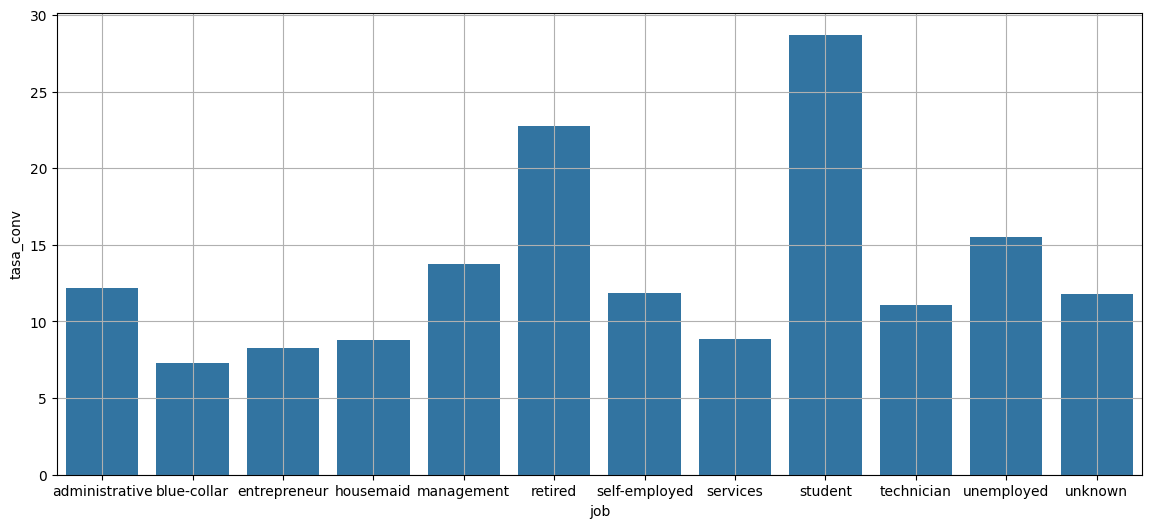

In [51]:
graficar_tasas_conversion('job', 'y_bin', type= 'bar')



*   Se observa que la mayor tasa de conversion con casi 30% son los estudiantes, seguido por los retirados alrededor 23% y los que no trabajan con un 16%.



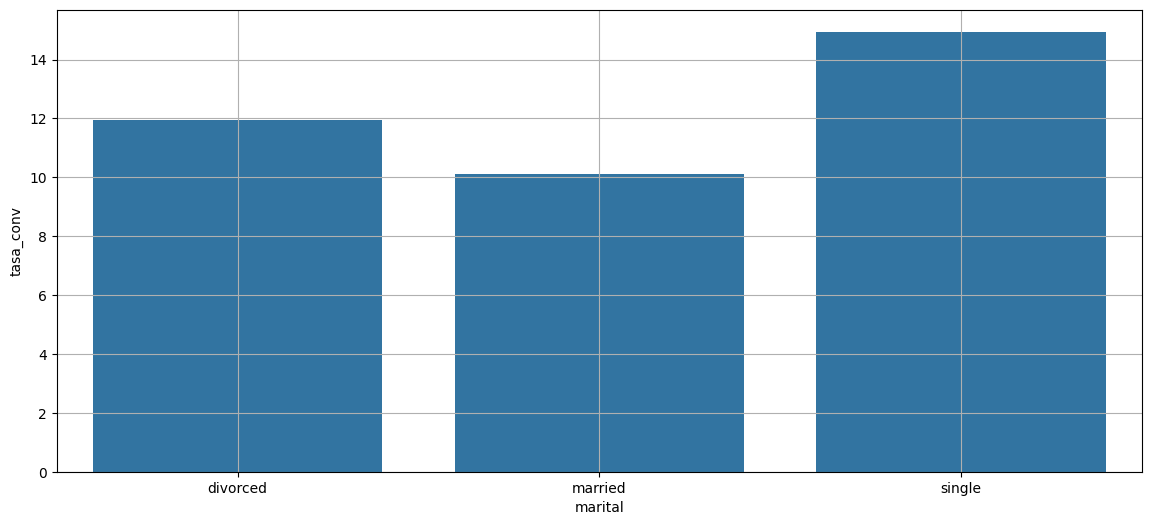

In [53]:
graficar_tasas_conversion('marital', 'y_bin', type= 'bar')



*   El estado civil es una variable que no influye tanto en la tasa de conversión. Sin embargo el mayor porcentaje es el soltero.
*   



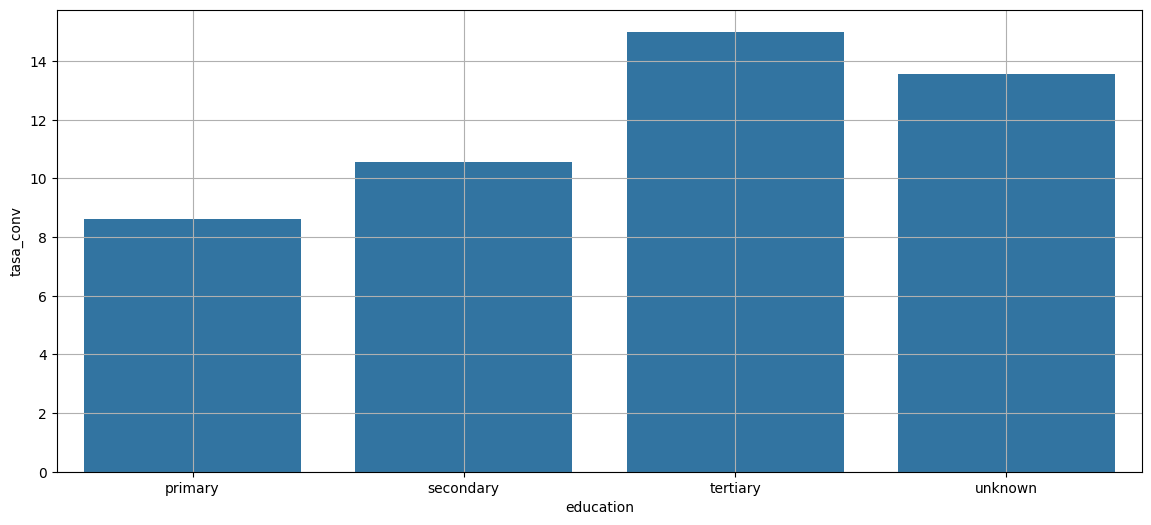

In [54]:
graficar_tasas_conversion('education', 'y_bin', type= 'bar')



*  A mayor nivel educativo, mayor probabilidad de que compre el producto. Dejando al lado el unknown que no conocemos.



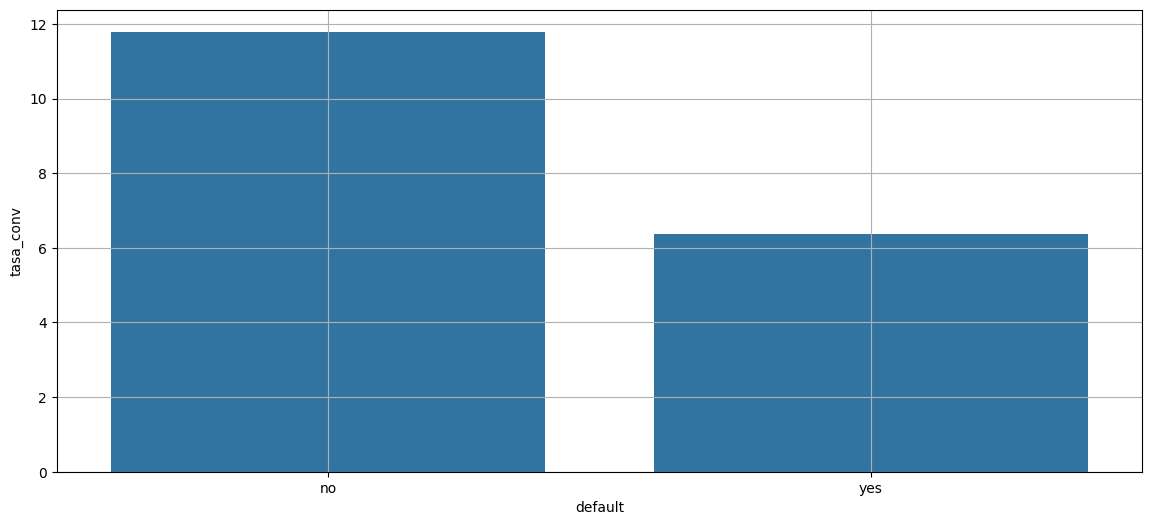

In [57]:
graficar_tasas_conversion('default', 'y_bin', type= 'bar')



*   La tasa de conversión de las personas que pagan a tiempo, es el doble de las que no aproximadamente.



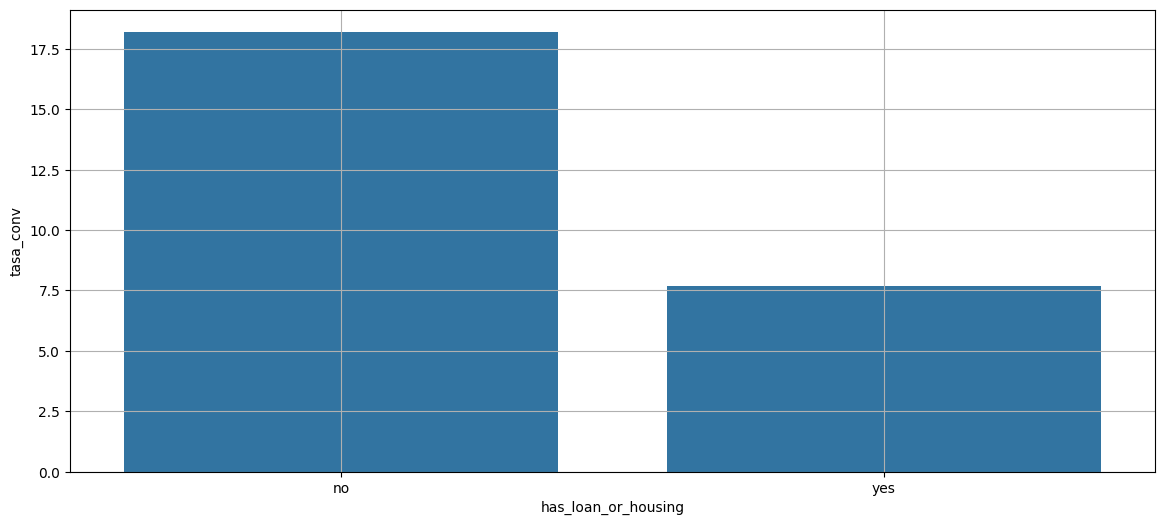

In [56]:
graficar_tasas_conversion('has_loan_or_housing', 'y_bin', type= 'bar')



*   En cuanto a las personas que no tienen un crédito activo es casi el doble de probable que acepten un producto. Es una variable predictora.


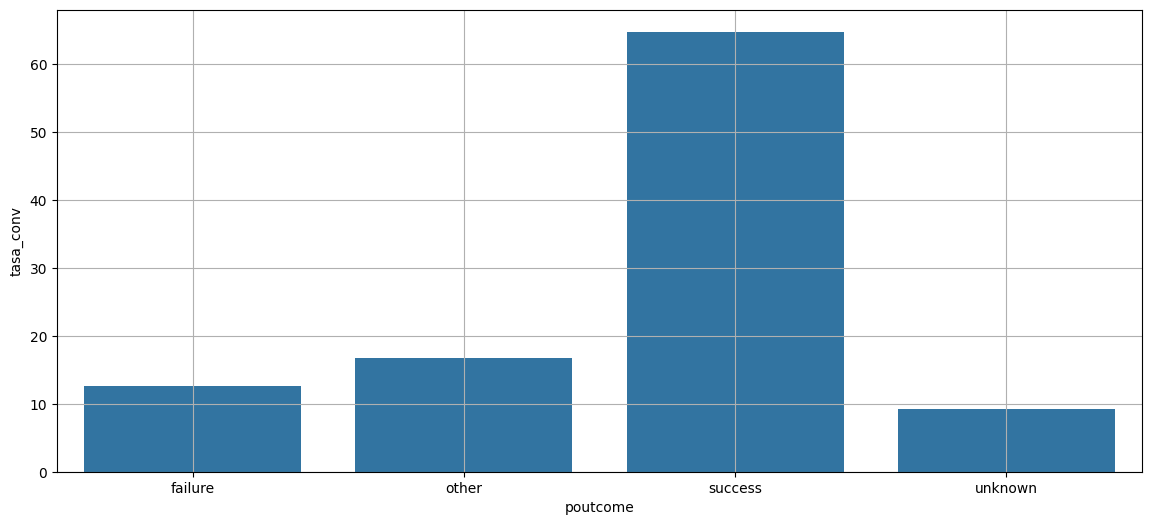

In [58]:
graficar_tasas_conversion('poutcome', 'y_bin', type= 'bar')



*   Comparamos entre failure y success, por lo que vemos que gracias a la campaña anterior tenemos el 70%  probabilidad de que nos acepte el producto.
*   Variable predictora



**Resumen**

Las variables predictoras que tienen mayor impacto son:



*   potucome: 70% de conversión para el nivel success
*   job: 28% y 22% de conversión para estudiantes y retired.
*   has_housing_or_loan: 17% de conversión
*   grupos_balance y grupos_edad: con tasas de conversión cercanas al 16%
*   marital y education: con tasas de conversión de 12 y 16%










**Análisis Bivariado**

In [73]:
def graficar_tc_bivariada(col_list, order=None):

  col_list= ['job', 'poutcome']
  tc= data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  plt.figure(figsize=(13,7))
  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)
  ax.yaxis.grid(True)
  ax.yaxis.grid(True)
  plt.title(f'Tasa de conversion para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversion (%)')
  plt.xlim((0,1));



<ipython-input-73-0aee5b5e5339>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


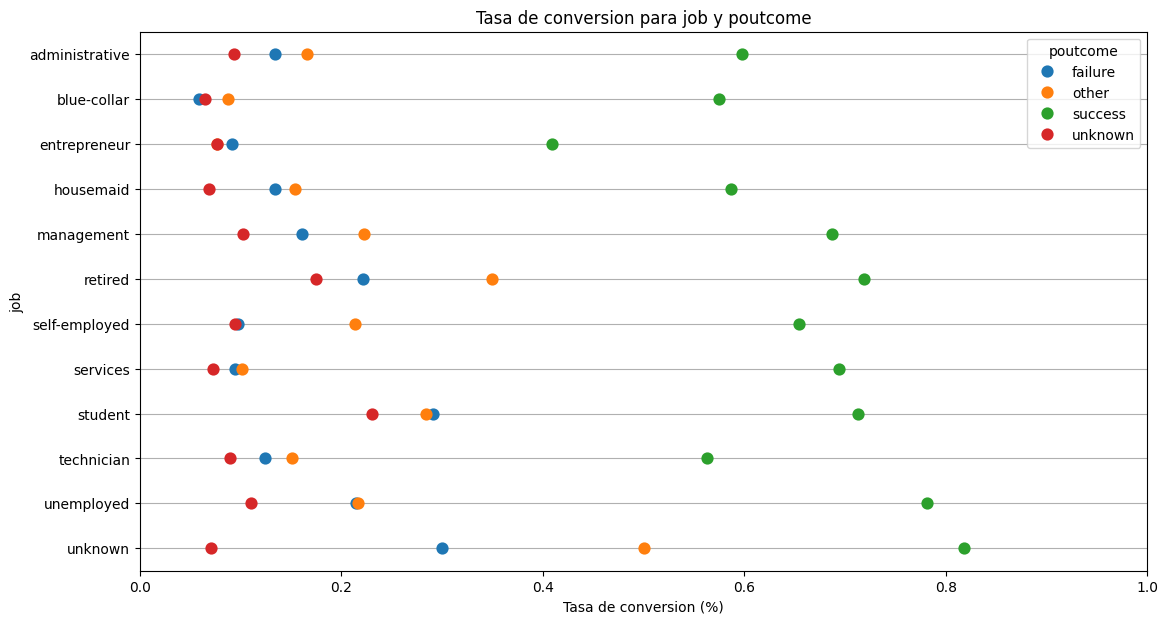

In [74]:
graficar_tc_bivariada(['job', 'poutcome'])



*   Las personas unemployed y que fueron contactadas anteriormente se puede observar que tiene casi un 80% de tasa de conversion de adquirir el producto.
*   student,retired, services casi un 70%
*   management con 68%
*   self/employed con 65%









In [75]:
def graficar_tc_bivariada(col_list, order=None):

  col_list= ['grupos_balance', 'poutcome']
  tc= data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  plt.figure(figsize=(13,7))
  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)
  ax.yaxis.grid(True)
  ax.yaxis.grid(True)
  plt.title(f'Tasa de conversion para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversion (%)')
  plt.xlim((0,1));

<ipython-input-75-3274da29194e>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


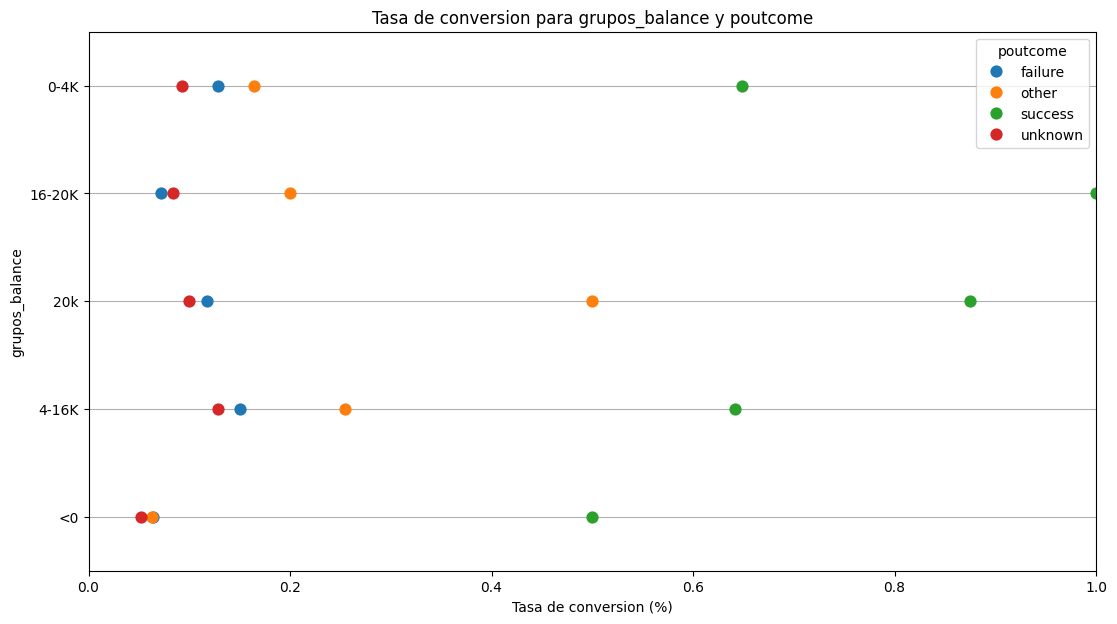

In [76]:
graficar_tc_bivariada(['grupos_balance', 'poutcome'])



*   Segmento de cliente entre 0/4 y 4/16k son clientes potenciales ya que tienen tasa de conversion del 65%

*   Clientes de mas de 20k tc 88%

*   Clientes entre 16/20 tasa de conversion de 100%





In [77]:
def graficar_tc_bivariada(col_list, order=None):

  col_list= ['grupos_edad', 'poutcome']
  tc= data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  plt.figure(figsize=(13,7))
  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)
  ax.yaxis.grid(True)
  ax.yaxis.grid(True)
  plt.title(f'Tasa de conversion para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversion (%)')
  plt.xlim((0,1));

<ipython-input-77-b25774857b95>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


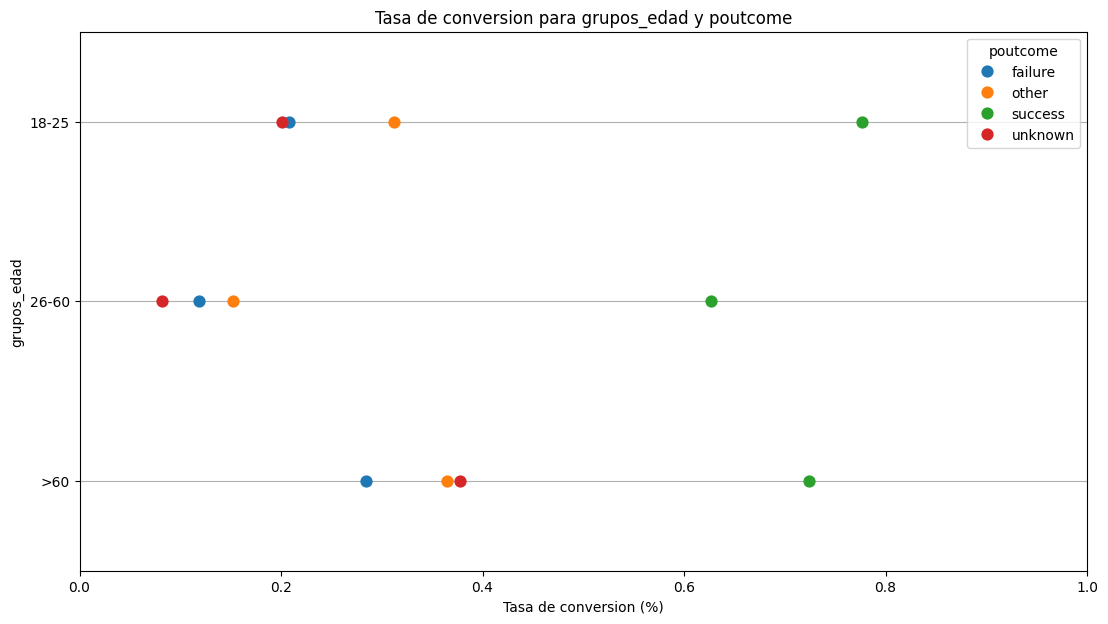

In [79]:
graficar_tc_bivariada(['grupos_edad', 'poutcome'])


*   Segmento por edad 26 a 60 tc 62%
*   Segmento por edad >60 tc 72%
*   Segmento por edad 18/25 tc 78%




In [80]:
def graficar_tc_bivariada(col_list, order=None):

  col_list= ['default', 'poutcome']
  tc= data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  plt.figure(figsize=(13,7))
  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)
  ax.yaxis.grid(True)
  ax.yaxis.grid(True)
  plt.title(f'Tasa de conversion para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversion (%)')
  plt.xlim((0,1));

<ipython-input-80-df4b62ccdf31>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


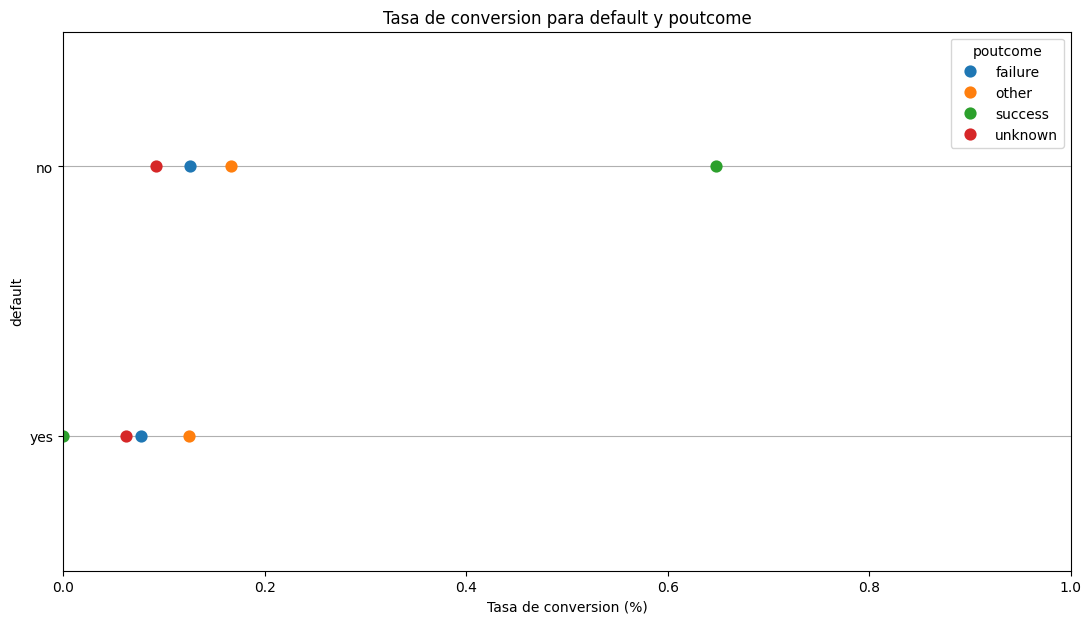

In [81]:
graficar_tc_bivariada(['default', 'poutcome'])



*   Enfocarse en personas que tengan deuda pero que hayan pagado a tiempo



In [82]:
def graficar_tc_bivariada(col_list, order=None):

  col_list= ['has_loan_or_housing', 'poutcome']
  tc= data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  plt.figure(figsize=(13,7))
  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)
  ax.yaxis.grid(True)
  ax.yaxis.grid(True)
  plt.title(f'Tasa de conversion para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversion (%)')
  plt.xlim((0,1));

<ipython-input-82-c009d19941f3>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax= sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


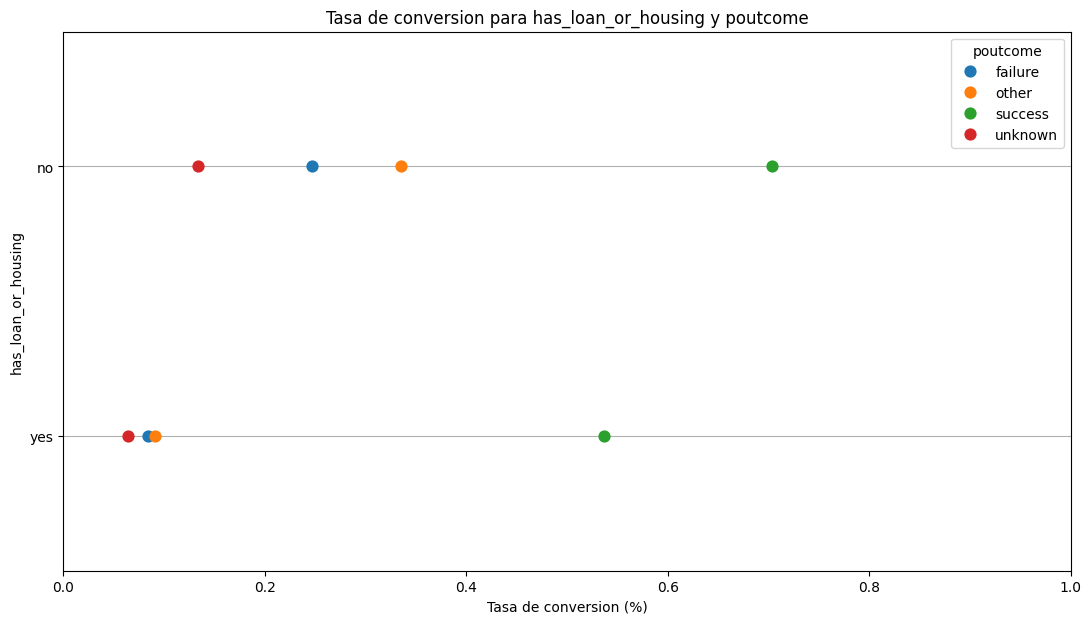

In [83]:
graficar_tc_bivariada(['has_loan_or_housing', 'poutcome'])



*  Enfocarse en personas que no tengan credito ya que tiene una mayor tasa de conversion



# Conclusiones

Al realizar los gráficos univariantes y bivariantes se puede concluir lo siguiente:

*   Se pudo ver que en tasa de conversión, las variables más importantes son: poutcome, job, grupos_balance y grupos_edad.
*   El perfil ideal del cliente sería: que haya sido contactado previamente por el banco y haber adquirido un producto.
*   Que tenga tipo de trabajo: desempleado, estudiante y jubilado.
*   Que el saldo de su cuenta bancaria este entre 16 y 20k
*   Que tenga entre 18 y 25 años y que no cuente con deudas crediticias, ni retrasos en sus pagos.





